In [1]:
from database import Database
from Filter.PB import PB
from Filter.MA import MA
from Filter.PB_MA import PB_MA
from Filter.Higher_Market import Higher_Market
from Filter.DoubleRateRise import DoubleRateRise
from Filter.ROE_H_PB_L import ROE_H_PB_L
from Filter.Chips import Chips
from Filter.GetFilterData import GetFilterData
from Utils.GetExtraX import GetExtraX
from FeatureSelect.FeatureSelect import FeatureSelect
from FeatureSelect.FeatureXMLGenerate import FeatureXMLGenerate
from Draw.StockDataVisualizer import StockDataVisualizer
from Draw.FeatureVisualizer import FeatureVisualizer

In [2]:
class DataStorage:
    def __init__(self):
        self.filtered_data = None
        self.features = None

In [3]:
def Analysis(func_name,start_d,end_d,*xml):
    data_storage = DataStorage()
    # 讀取資料
    db = Database()
    # #TODO:一次取完變成data?
    # stock_data = db.get_stock(start_d,end_d).drop('id', axis=1)
    company_data =db.get_company_basic()
    q_data=db.get_finance_report_q()
    m_data=db.get_finance_report_m()
    s_data = db.get_stock(start_d,end_d)
    mk_data = db.get_market_index(start_d,end_d)
    ch_data = db.get_chips(start_d,end_d)

    #選擇策略+防呆
    if func_name == "F_PB":
        selected_companies = PB(q_data)

    elif func_name == "F_DoubleRateRise":
        selected_companies = DoubleRateRise(q_data,start_d)
        
    elif func_name == "F_Chips":
        selected_companies = Chips(ch_data,*xml)

    elif func_name == "F_MA":
        selected_companies = MA(s_data)

    elif func_name == "F_PB_MA":
        selected_companies = PB_MA(q_data,start_d,s_data)
        
    elif func_name == "F_Higher_Market":
        selected_companies = Higher_Market(s_data,company_data,mk_data,start_d,end_d)

    elif func_name == "F_ROE_H_PB_L":
        selected_companies = ROE_H_PB_L(q_data,company_data)

    else:
        return "請選擇合適篩選標準"
    print(len(selected_companies))
    print(selected_companies)
    combine = GetFilterData(company_data,m_data,q_data,s_data,mk_data,ch_data,selected_companies,start_d,end_d)
    filtered_data=combine.getFliterData()

    import pandas as pd
    with pd.ExcelWriter('filtered_data.xlsx', engine='openpyxl') as writer:
        filtered_data.to_excel(writer, index=False, sheet_name='Sheet1')
    
    print(f"符合條件股數:{len(filtered_data)}")

    visualizer = StockDataVisualizer(filtered_data)
    visualizer.get_heat_map_all()
    visualizer.get_industry_pie_all()
    visualizer.get_bar_chart_all()
   
    if xml:
        addX_data = GetExtraX(filtered_data,xml[0])
    else:
        addX_data = filtered_data

    features = FeatureSelect(addX_data)

    FeatureXMLGenerate(features)
    
    data_storage.features, data_storage.filtered_data = features, filtered_data
    return features, filtered_data
    

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\database.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_from_db[columns_to_fill] = filtered_df_from_db[columns_to_fill].fillna(0)


271
[  1102   1103   1104   1109   1217   1218   1234   1236   1312   1313
   1314   1315   1325   1336   1337   1338   1340   1402   1409   1413
   1416   1417   1434   1437   1439   1440   1444   1447   1449   1451
   1452   1455   1456   1460   1465   1466   1467   1474   1517   1528
   1530   1531   1539   1569   1589   1595   1626   1701   1714   1718
   1725   1806   1809   1810   1906   1907   1909   2007   2010   2023
   2029   2038   2062   2069   2103   2104   2107   2115   2239   2316
   2317   2323   2354   2355   2362   2365   2375   2390   2392   2409
   2431   2443   2474   2477   2489   2501   2505   2506   2509   2511
   2514   2515   2520   2524   2527   2534   2536   2537   2547   2601
   2603   2605   2607   2609   2611   2612   2613   2615   2616   2617
   2637   2641   2701   2702   2704   2705   2706   2809   2820   2832
   2834   2836   2838   2845   2849   2852   2855   2867   2882   2883
   2888   2897   2905   2915   2923   2929   3015   3031   3049   3050
  

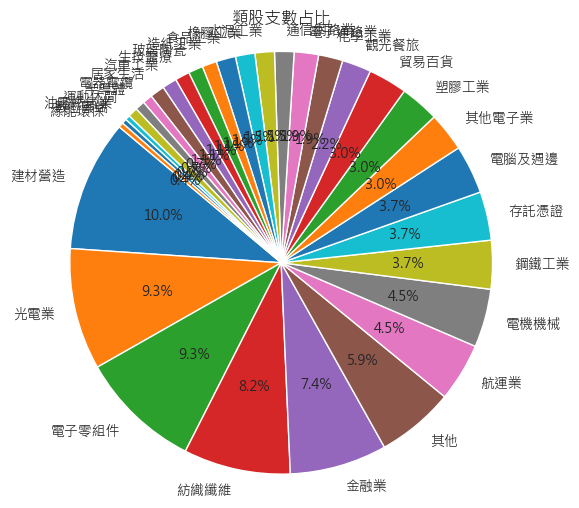

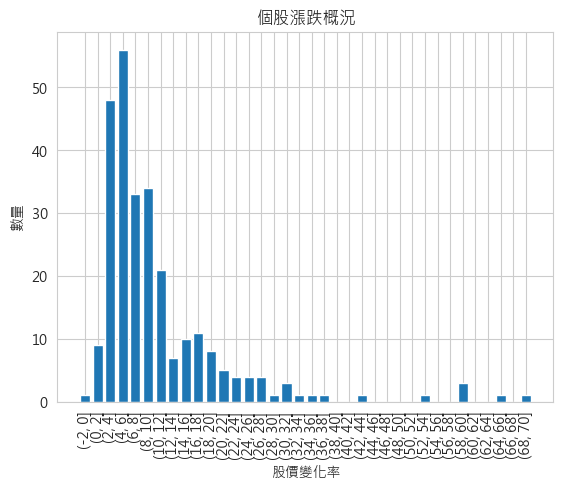

產業名稱
指數10日均價(元)
指數60日均價(元)
指數開盤價(元)
指數最低價(元)
{'產業名稱': '類別', '指數10日均價(元)': '數值', '指數60日均價(元)': '數值', '指數開盤價(元)': '數值', '指數最低價(元)': '數值'}


In [4]:

# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/07/01','XML_chip1031.xml')
#可行的(收盤)
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/06/30')#沒有很明顯
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/06/16')#沒有很明顯
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/05/31')
# features, filtered_data = Analysis("F_Chips",'2023/05/16','2023/05/31','XML_chip.xml')#實驗二
# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/10/16')#這濾網不能用
# features, filtered_data = Analysis("F_PB_MA",'2023/05/16','2023/08/16')#失敗
# features, filtered_data = Analysis("F_MA",'2023/05/16','2023/05/31')#不明顯
# features, filtered_data = Analysis("F_MA",'2023/08/15','2023/08/21')#實驗三
# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/05/16','2023/08/15')#失敗
# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/05/16','2023/06/15')#失敗

#有bug



#不可行

# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/07/17')# 換成3*3
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/07/17')#5


#features, filtered_data = Analysis("F_PB_MA",'2023/08/15','2023/10/16')#5


# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/09/16','extraX.xml')
# 執行 Analysis 函式
# analysis_result = Analysis("F_PB", '2023/03/15', '2023/09/15', 'XML_chip1031.xml')


In [5]:
# filtered_data.to_csv('filtered_data.csv', index=False, encoding='utf-8')

In [6]:
# F_Draw(filtered_data,features,'v1TestXML1030.xml')

<Figure size 640x480 with 0 Axes>

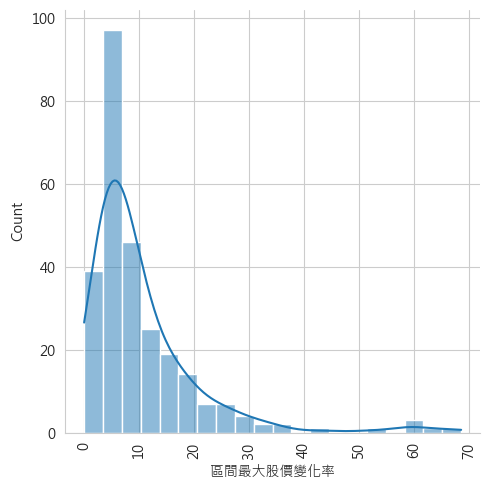

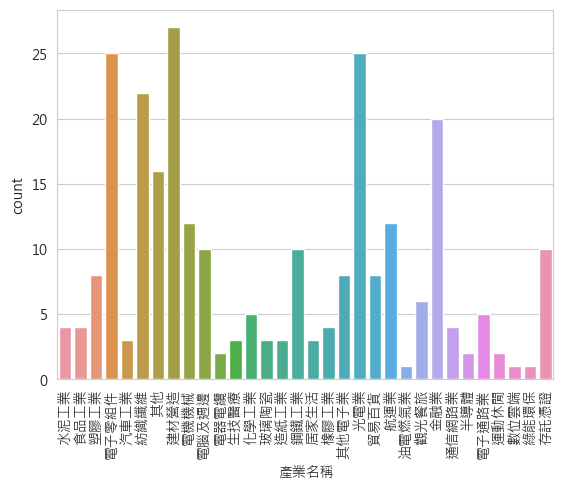

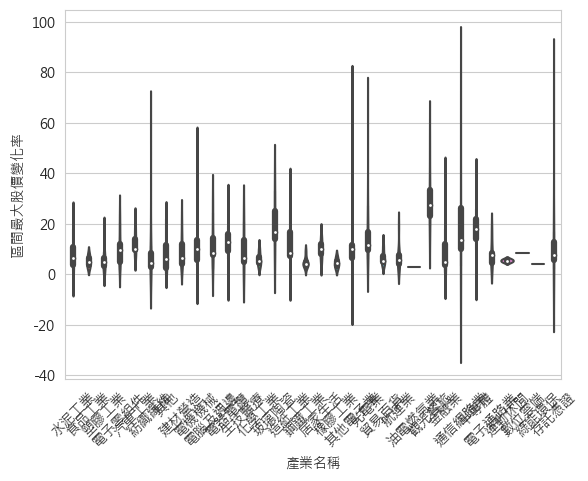

<Figure size 1000x600 with 0 Axes>

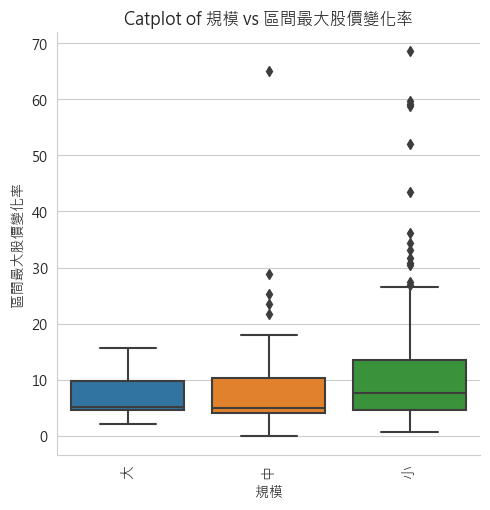

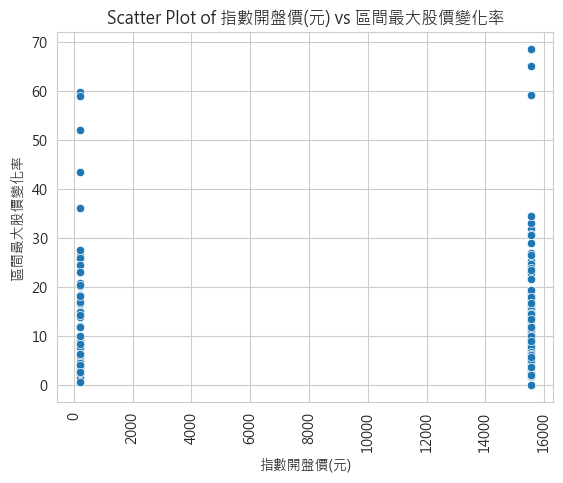

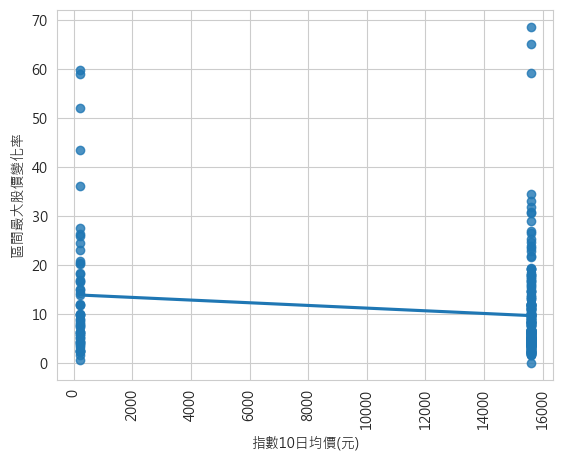

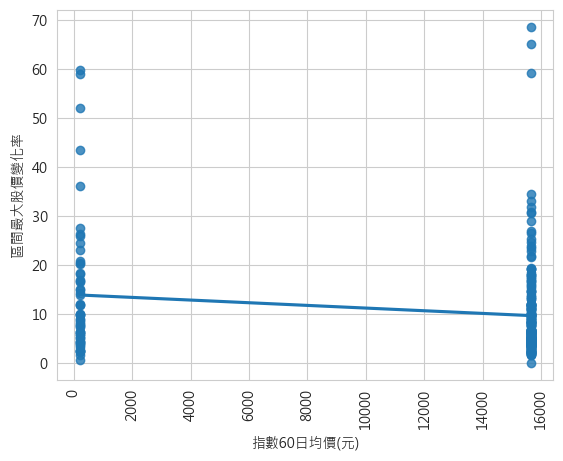

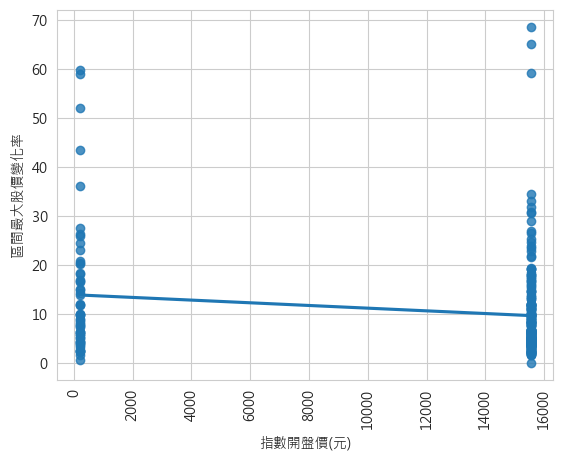

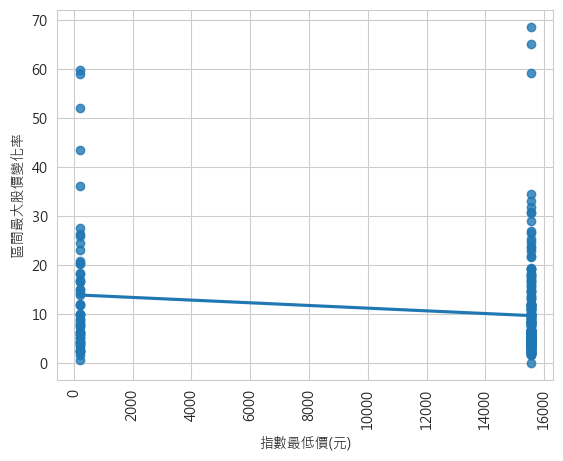

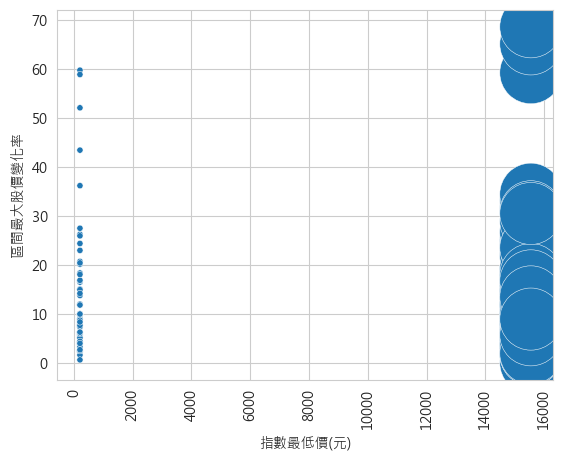

<Figure size 640x480 with 0 Axes>

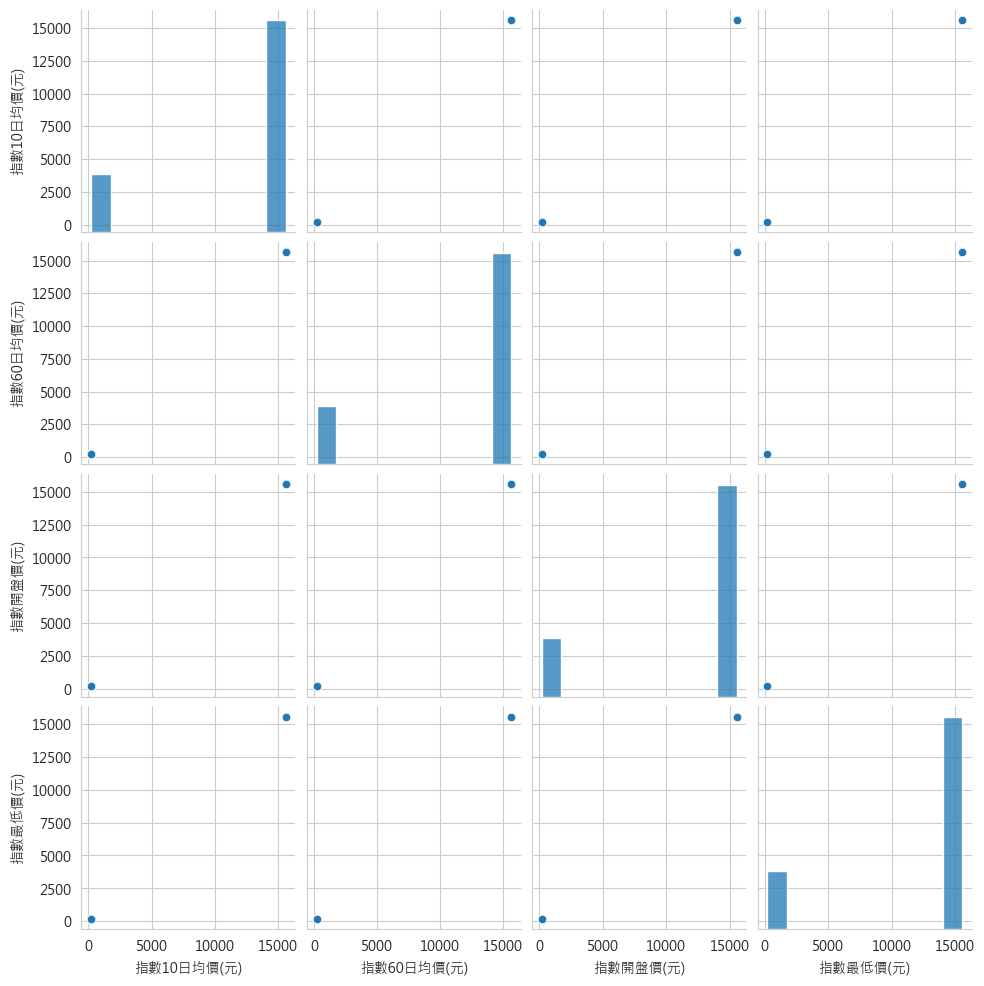

In [7]:
VisualizationEngine= FeatureVisualizer(filtered_data,features,'xml/stock_analysis.xml')
# #畫單一圖
VisualizationEngine.SingleFeaturesVisualizer()

combinations_list
[('產業名稱', '指數10日均價(元)', '指數60日均價(元)'), ('產業名稱', '指數10日均價(元)', '指數開盤價(元)'), ('產業名稱', '指數10日均價(元)', '指數最低價(元)'), ('產業名稱', '指數60日均價(元)', '指數開盤價(元)'), ('產業名稱', '指數60日均價(元)', '指數最低價(元)'), ('產業名稱', '指數開盤價(元)', '指數最低價(元)'), ('指數10日均價(元)', '指數60日均價(元)', '指數開盤價(元)'), ('指數10日均價(元)', '指數60日均價(元)', '指數最低價(元)'), ('指數10日均價(元)', '指數開盤價(元)', '指數最低價(元)'), ('指數60日均價(元)', '指數開盤價(元)', '指數最低價(元)')]
final_combinations
[('產業名稱', '指數10日均價(元)', '指數60日均價(元)'), ('指數10日均價(元)', '指數60日均價(元)', '產業名稱'), ('指數60日均價(元)', '產業名稱', '指數10日均價(元)'), ('產業名稱', '指數10日均價(元)', '指數開盤價(元)'), ('指數10日均價(元)', '指數開盤價(元)', '產業名稱'), ('指數開盤價(元)', '產業名稱', '指數10日均價(元)'), ('產業名稱', '指數10日均價(元)', '指數最低價(元)'), ('指數10日均價(元)', '指數最低價(元)', '產業名稱'), ('指數最低價(元)', '產業名稱', '指數10日均價(元)'), ('產業名稱', '指數60日均價(元)', '指數開盤價(元)'), ('指數60日均價(元)', '指數開盤價(元)', '產業名稱'), ('指數開盤價(元)', '產業名稱', '指數60日均價(元)'), ('產業名稱', '指數60日均價(元)', '指數最低價(元)'), ('指數60日均價(元)', '指數最低價(元)', '產業名稱'), ('指數最低價(元)', '產業名稱', '指數60日均價(元)'), ('產業名稱', '指數開盤價(元)', '指數最低價(元)'), (

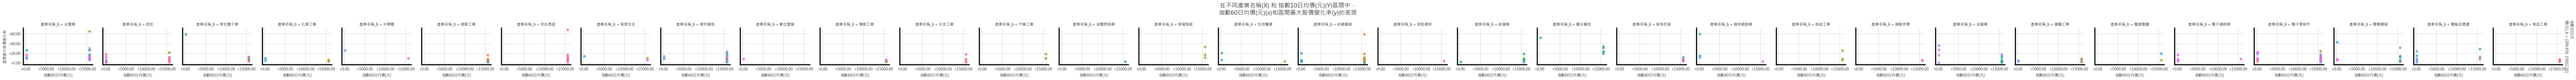

指數60日均
價(元)_b
產業名稱_b


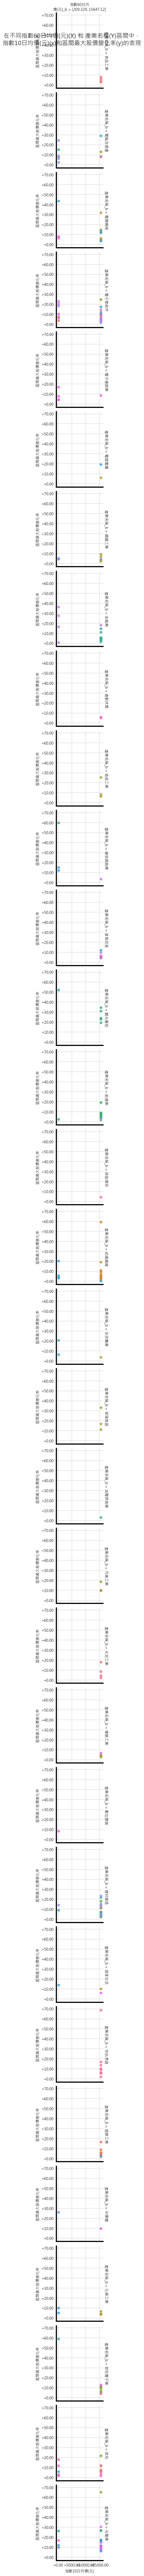

產業名稱_b
指數10日均
價(元)_b


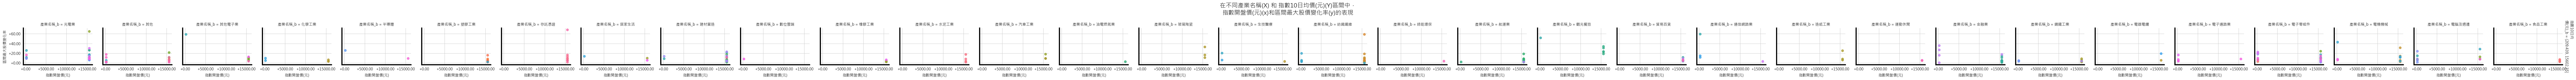

指數開盤價(
元)_b
產業名稱_b


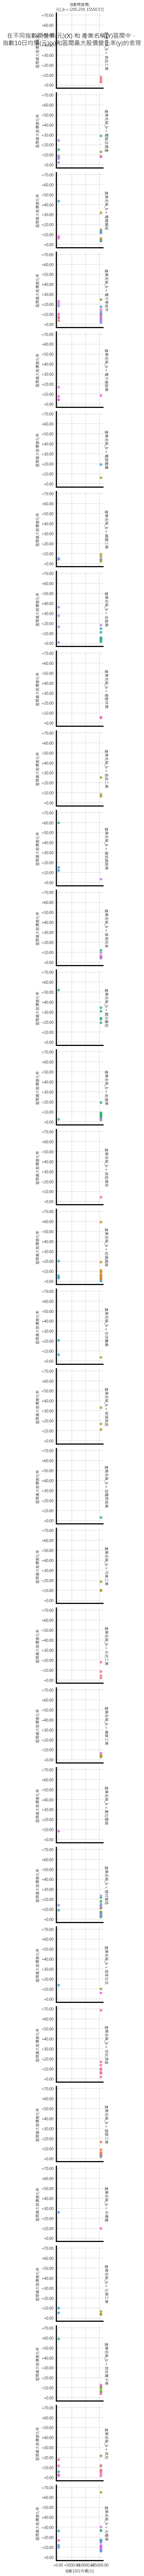

產業名稱_b
指數10日均
價(元)_b


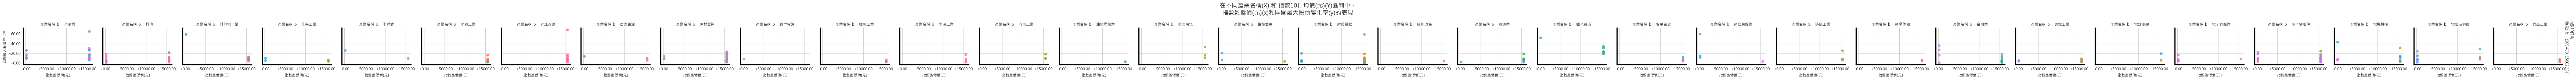

指數最低價(
元)_b
產業名稱_b


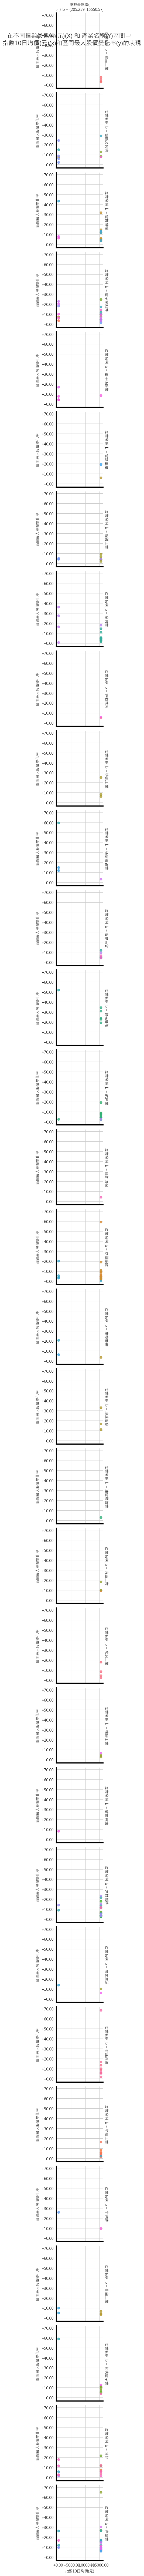

產業名稱_b
指數60日均
價(元)_b


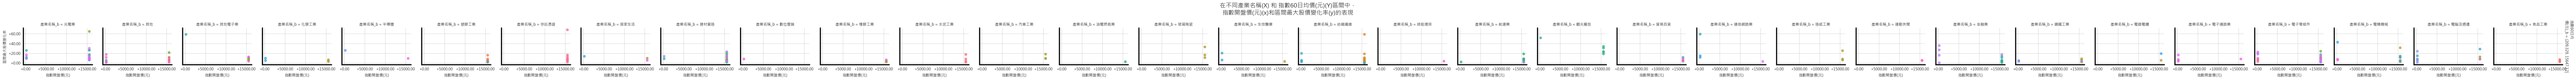

指數開盤價(
元)_b
產業名稱_b


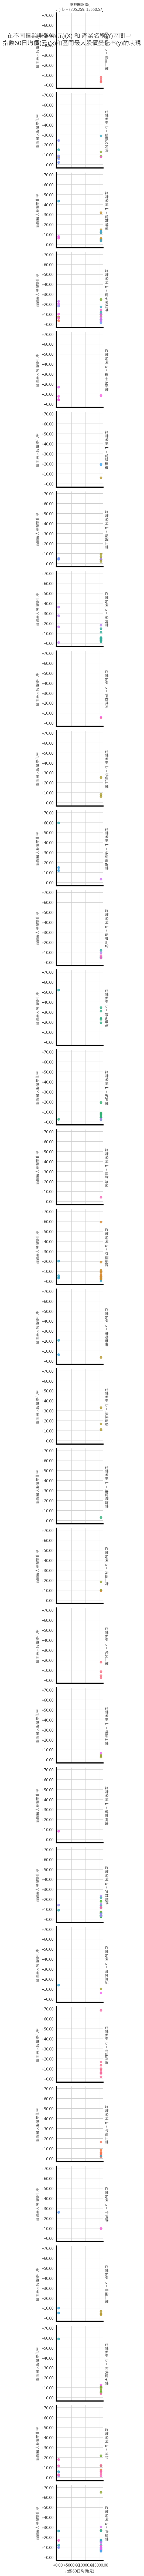

產業名稱_b
指數60日均
價(元)_b


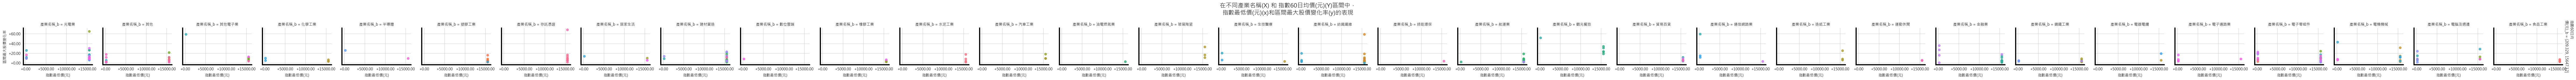

指數最低價(
元)_b
產業名稱_b


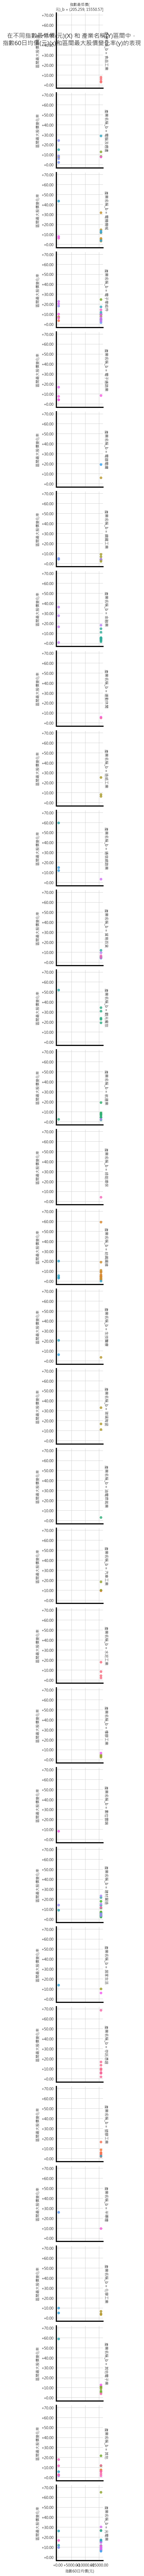

產業名稱_b
指數開盤價(
元)_b


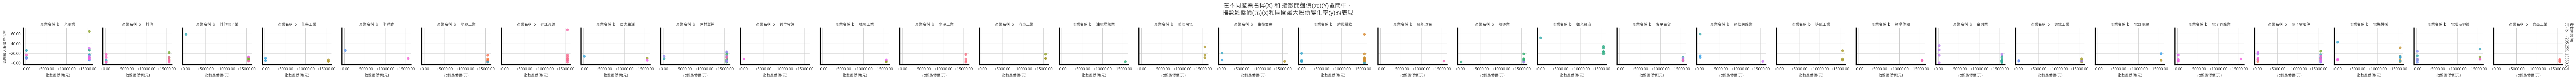

指數最低價(
元)_b
產業名稱_b


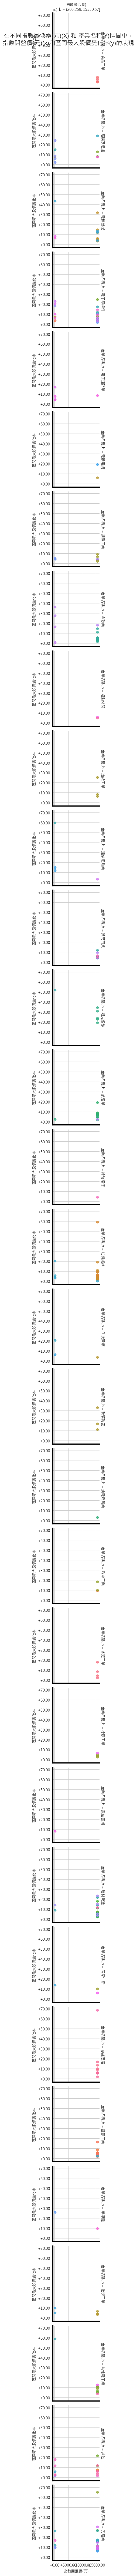

指數10日均
價(元)_b
指數60日均
價(元)_b


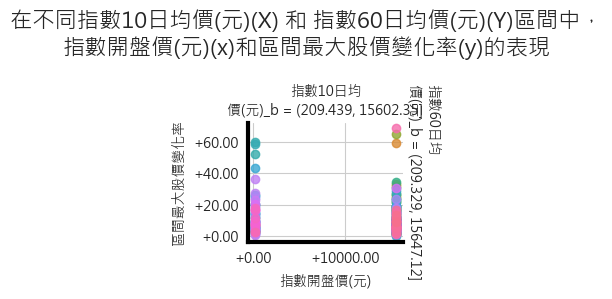

指數60日均
價(元)_b
指數開盤價(
元)_b


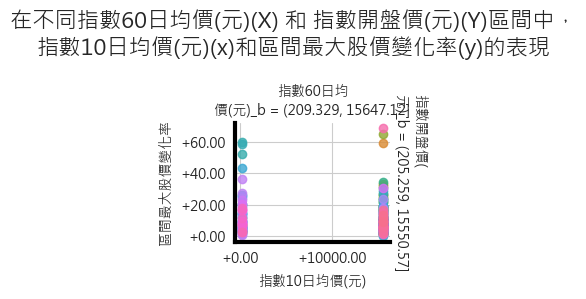

指數開盤價(
元)_b
指數10日均
價(元)_b


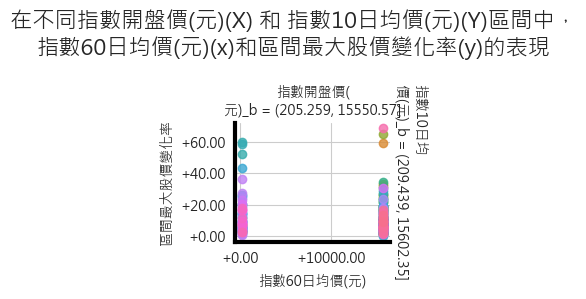

指數10日均
價(元)_b
指數60日均
價(元)_b


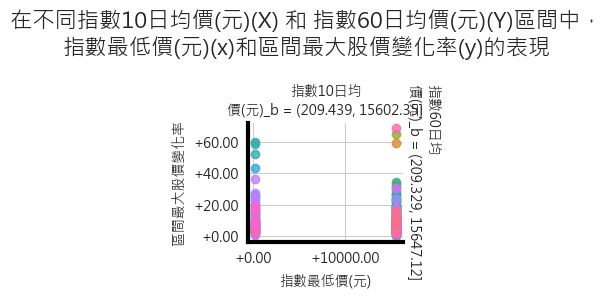

指數60日均
價(元)_b
指數最低價(
元)_b


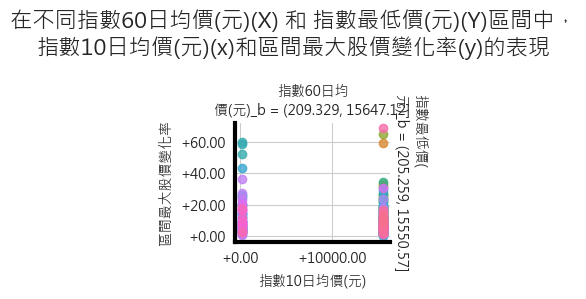

指數最低價(
元)_b
指數10日均
價(元)_b


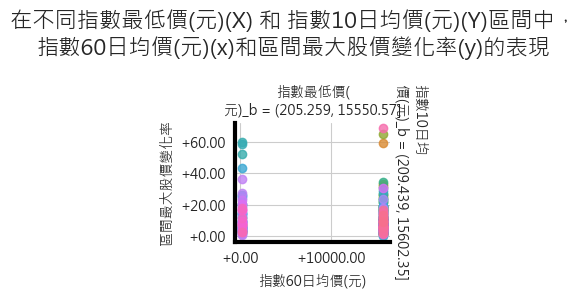

指數10日均
價(元)_b
指數開盤價(
元)_b


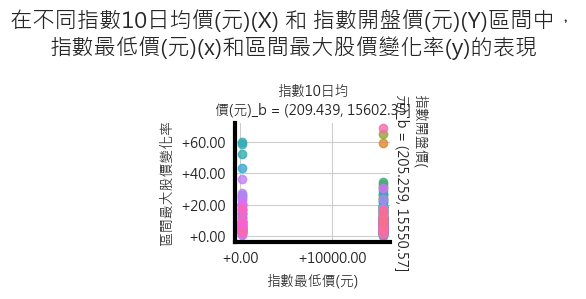

指數開盤價(
元)_b
指數最低價(
元)_b


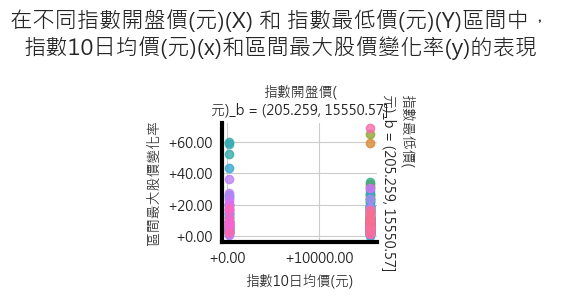

指數最低價(
元)_b
指數10日均
價(元)_b


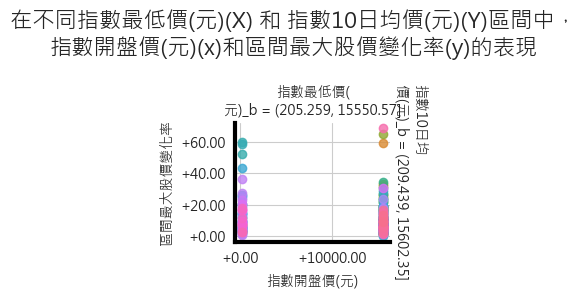

指數60日均
價(元)_b
指數開盤價(
元)_b


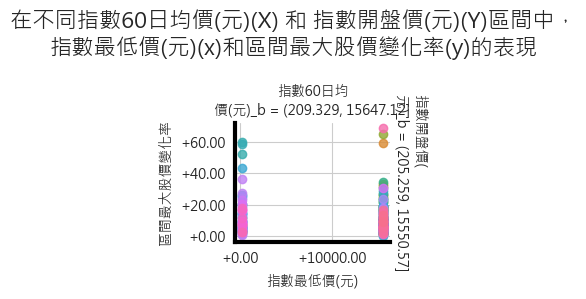

指數開盤價(
元)_b
指數最低價(
元)_b


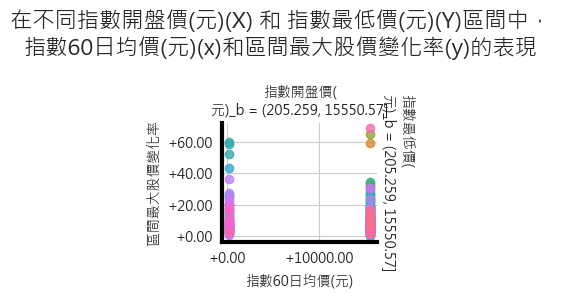

指數最低價(
元)_b
指數60日均
價(元)_b


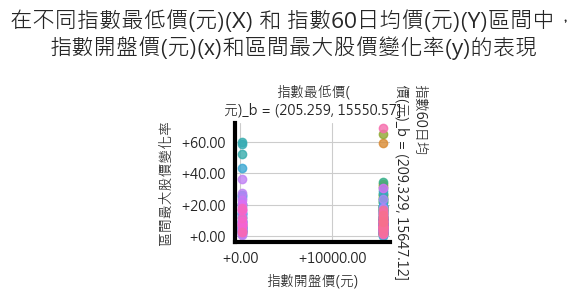

In [8]:
# #畫facegrid
VisualizationEngine.SelectedFeatureVisualizer()

In [9]:
features

{'產業名稱': '類別',
 '指數10日均價(元)': '數值',
 '指數60日均價(元)': '數值',
 '指數開盤價(元)': '數值',
 '指數最低價(元)': '數值'}

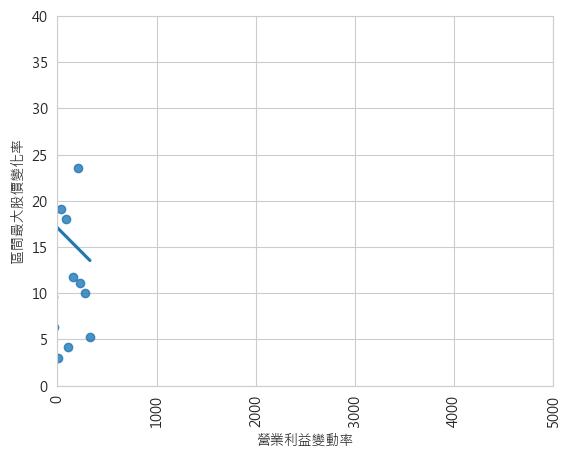

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# 3.3.3
data = filtered_data[(filtered_data['營業利益成長率']>81.67) & (filtered_data['800-1000張(比率)'] <=1.32)]
# data = filtered_data[(5.05 < filtered_data['最高價當日-融券餘額(張)變化率']) & (filtered_data['最高價當日-融券餘額(張)變化率'] <= 67.26) & (0.213 < filtered_data['最高價當日-1000張以上(比率)變化']) & (filtered_data['最高價當日-1000張以上(比率)變化'] <= 0.7)]
fig = plt.figure()
ax = sns.regplot(x='營業利益變動率', y='區間最大股價變化率', data=data,ci=0)
plt.xticks(rotation=90)
ax.set_xlim(0,5000)
ax.set_ylim(0, 40)
plt.show()
